You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [1]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
files.upload()

Saving Y.npy to Y.npy
Saving X.npy to X.npy


In [3]:
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label
x_l = x_l.reshape(2062,4096)

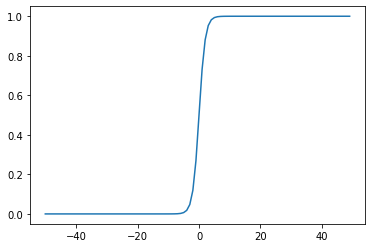

In [ ]:
x_points = range(-50,50)
sigmoid_points =[ 1/(1+np.exp(-x)) for x in x_points ]
plt.plot(x_points,sigmoid_points)

Sigmoid function is used for binary classification. The graph for the sigmoid function can be seen above. As seen the y value lies in the range of 0 to 1. If y >= 0.5 then it classifies it to one otherwise 0



For doing mutliclass classification with the help of sigmoid function there are two techiniques:
- One vs One
- One vs All

One vs All:
  In this approach we find "Weight(W)" respective to each unique class. For prediction using this weight we find the class with maximum value of the sigmoid function and allot that class

One vs One: 
  In this approach we find "Weight(W)" respective to each unique class. For prediction using this weight we find the class with maximum value of the sigmoid function and allot that class
  

In [4]:
def normalise(X):
    return np.subtract(X,X.min())/np.subtract(X.max(),X.min())

In [39]:
X = normalise(x_l)
Y = y_l
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

# One vs All

In [6]:
W = np.zeros((len(X_train[0]),10))
W_ = np.random.rand(10)


def pred_y(W,W_,X):
    return sigmoid(np.dot(X,W)+W_)
def sigmoid(X):
    return 1/(1+np.exp(-X))

def cost_func(W,W_,X,Y):
    
    return (-1/len(X))*np.sum(Y*np.log(Y) + (1-Y)*np.log(1-Y))
    

def train(W,W_,X,Y,l,epoch):
    m = len(X[:,0])
    for i in range(epoch):
            
            error_y = pred_y(W,W_,X)-Y
            
            delta = (l/m) * np.dot(error_y.T, X)
            tempW = W - delta.T  
            tempW_ = W_ - l/m * np.sum(error_y)
            W,W_ = tempW,tempW_
        
    return W,W_

start = time.time()
z,z_= train(W,W_,X_train,Y_train,0.016,2000)
end = time.time()
print("Training ran for:",end-start)

Training ran for: 103.21555209159851


In [8]:
actual_y = np.argmax(Y_test,axis=1)
my_model_prediction = np.argmax(pred_y(z,z_,X_test),axis=1)
print("-----------------------------\nAccuracy Score: ", accuracy_score(my_model_prediction,actual_y))
print("-----------------------------\nConfusion Matrix:\n", confusion_matrix(my_model_prediction,actual_y))
print("-----------------------------\nClassification Report:\n",classification_report(my_model_prediction,actual_y))

-----------------------------
Accuracy Score:  0.7302100161550888
-----------------------------
Confusion Matrix:
 [[60  1  0  0  1  7  1  2  1  3]
 [ 1 41  2  2  2  1  3  3  3  1]
 [ 1  0 44  1  2  3 11  0  6  0]
 [ 0  0  2 54  1  3 14  0  4  0]
 [ 1  2  0  0 49  3  0  0  6  0]
 [ 3  0  3  1  5 52 13  0  1  0]
 [ 0  0  1  4  0  0 12  0  0  0]
 [ 1  0  0  0  1  0  1 47  2  3]
 [ 1  1  8  6  0  0  0  2 40  0]
 [ 4  0  0  0  1  0  5  5  1 53]]
-----------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        76
           1       0.91      0.69      0.79        59
           2       0.73      0.65      0.69        68
           3       0.79      0.69      0.74        78
           4       0.79      0.80      0.80        61
           5       0.75      0.67      0.71        78
           6       0.20      0.71      0.31        17
           7       0.80      0.85      0.82        55
           8 

In [9]:
start = time.time()
logical_regression = LogisticRegression(max_iter=1000)
model = OneVsRestClassifier(logical_regression)
model.fit(X_train, Y_train)
end = time.time()
print("Training ran for :",end - start)

Training ran for : 53.93801712989807


In [11]:
sklearn_model_prediction = np.argmax(model.predict(X_test),axis=1)
# sklearn_model_prediction = clf.predict(X_test)
actual_y = np.argmax(Y_test,axis=1)
# print("-----------------------------\nAccuracy Score: ", accuracy_score(sklearn_model_prediction,Y_test))
print("-----------------------------\nAccuracy Score: ", accuracy_score(sklearn_model_prediction,actual_y))
print("-----------------------------\nConfusion Matrix:\n", confusion_matrix(sklearn_model_prediction,actual_y))
print("-----------------------------\nClassification Report:\n",classification_report(sklearn_model_prediction,actual_y))

-----------------------------
Accuracy Score:  0.6365105008077544
-----------------------------
Confusion Matrix:
 [[70  4 18 21 13 26 22 12 22 16]
 [ 0 40  1  0  0  0  2  1  1  0]
 [ 1  0 33  1  2  3  5  0  2  0]
 [ 0  1  0 40  0  2  8  0  6  0]
 [ 0  0  0  0 42  1  0  0  3  0]
 [ 0  0  3  0  4 36  3  0  0  0]
 [ 0  0  0  4  1  1 20  0  0  1]
 [ 0  0  0  0  0  0  0 44  2  2]
 [ 0  0  5  2  0  0  0  1 28  0]
 [ 1  0  0  0  0  0  0  1  0 41]]
-----------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.31      0.47       224
           1       0.89      0.89      0.89        45
           2       0.55      0.70      0.62        47
           3       0.59      0.70      0.64        57
           4       0.68      0.91      0.78        46
           5       0.52      0.78      0.63        46
           6       0.33      0.74      0.46        27
           7       0.75      0.92      0.82        48
           8 

# One vs One

In [40]:
"""
CONVERTING Y FROM ONE HOT ENCODING TO LABEL ENCODING
"""
ylt = np.zeros((len(Y_test),1))

yltrain = np.zeros((len(Y_train),1))
for i in range(len(Y_test)):
    ylt[i] = np.where(Y_test[i]==1)[0]

for i in range(len(Y_train)):
    yltrain[i] = np.where(Y_train[i]==1)[0]

In [41]:
# OVO CLASSES
unique_classes = np.unique(yltrain)
ovo_classes = []
for i in range(len(unique_classes)):
    for j in range(1+i,len(unique_classes)):
        ovo_classes+=[[i,j]]

# INITIALISING W

W = np.zeros((len(X_train[0]),len(ovo_classes)))
W_ = np.zeros((len(ovo_classes),1))


# HELPER FUNCTIONS
def pred_y(W,W_,X):
    return sigmoid(np.dot(X,W)+W_)
def sigmoid(X):
    return 1/(1+np.exp(-X))

def cost_func(W,W_,X,Y):
    return (-1)*np.sum(Y*np.log(Y) + (1-Y)*np.log(1-Y))
    

def train(W,W_,X,Y,l,epoch):
    m = len(X[:,0])
    for i in range(epoch):
        error_y = pred_y(W,W_,X)-Y
        delta = (l/m) * np.dot(error_y.T, X)
        tempW = W - delta.T  
        tempW_ = W_ - l/m * np.sum(error_y)
        W,W_ = tempW,tempW_
            
    return W.reshape(len(X[0])),W_

def predict_label(X_test,W,W_):
  i=0
  result= []
  for a,b in ovo_classes:
      a_row= np.where(pred_y(W[:,i],W_[i],X_test)>0.5,b,a)
      result+=[a_row]
      i+=1
  result = np.array(result)


  answer = []
  # print(result.T.shape)
  for row in result.T:
      answer +=[np.argmax(np.bincount(row))]
  answer = np.array(answer).reshape(-1,1).astype(float)
  return answer


In [46]:
# TRAINING MODEL
start = time.time()
i=0
for a,b in ovo_classes:
    X_ovo_train = X_train[np.where(np.logical_or(yltrain.reshape(len(Y_train))==a ,yltrain.reshape(len(Y_train))==b ))]
    Y_ovo_train = yltrain[np.where(np.logical_or(yltrain.reshape(len(Y_train))==a ,yltrain.reshape(len(Y_train))==b ))]
    Y_ovo_train = np.where(Y_ovo_train.reshape(len(Y_ovo_train))==a ,0,1)
    W[:,i],W_[i] = train(W[:,i].reshape(-1,1),W_[i],X_ovo_train,Y_ovo_train.reshape(-1,1),0.01,1500)
    i+=1
end = time.time()
print("Training ran for:",end-start)

Training ran for: 246.30402398109436


In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
my_model_prediction = (predict_label(X_test,W,W_))
print("-----------------------------\nAccuracy Score: ", accuracy_score(my_model_prediction,ylt))
print("-----------------------------\nConfusion Matrix:\n", confusion_matrix(my_model_prediction,ylt))
print("-----------------------------\nClassification Report:\n",classification_report(my_model_prediction,ylt))

-----------------------------
Accuracy Score:  0.7802907915993538
-----------------------------
Confusion Matrix:
 [[49  0  0  1  1  2  2  3  0  2]
 [ 2 58  1  1  2  0  3  0  0  0]
 [ 0  1 34  2  6  5 11  0  2  0]
 [ 0  1  2 39  0  2  7  0  2  0]
 [ 0  3  2  0 55  3  0  2  5  0]
 [ 1  0  3  0  2 51  5  1  2  0]
 [ 2  1  5  4  1  1 42  0  0  2]
 [ 0  0  0  1  1  0  0 56  0  2]
 [ 1  0  7  3  1  0  3  1 45  0]
 [ 1  0  0  1  0  1  2  5  0 54]]
-----------------------------
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.82      0.84        60
         1.0       0.91      0.87      0.89        67
         2.0       0.63      0.56      0.59        61
         3.0       0.75      0.74      0.74        53
         4.0       0.80      0.79      0.79        70
         5.0       0.78      0.78      0.78        65
         6.0       0.56      0.72      0.63        58
         7.0       0.82      0.93      0.87        60
         8.0 

In [19]:
Y_train.shape

(1443, 10)

In [22]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
y_tr = np.argmax(Y_train,axis=1)
start = time.time()
model2 = OneVsOneClassifier(LogisticRegression(max_iter=1000)).fit(X_train, y_tr)
end = time.time()
print("\nTime taken :",end - start)



Time taken : 21.523762226104736


In [25]:
sklearn_model_prediction = model2.predict(X_test)
# sklearn_model_prediction = clf.predict(X_test)
actual_y = np.argmax(Y_test,axis=1)
# print("-----------------------------\nAccuracy Score: ", accuracy_score(sklearn_model_prediction,Y_test))
print("-----------------------------\nAccuracy Score: ", accuracy_score(sklearn_model_prediction,actual_y))
print("-----------------------------\nConfusion Matrix:\n", confusion_matrix(sklearn_model_prediction,actual_y))
print("-----------------------------\nClassification Report:\n",classification_report(sklearn_model_prediction,actual_y))

-----------------------------
Accuracy Score:  0.8255250403877221
-----------------------------
Confusion Matrix:
 [[65  0  0  0  1  2  0  2  1  3]
 [ 1 44  2  1  2  1  3  2  2  1]
 [ 1  0 43  1  3  2  7  0  2  1]
 [ 0  1  0 57  0  2  5  1  3  0]
 [ 1  0  1  0 49  0  0  0  4  0]
 [ 1  0  1  0  3 60  2  0  0  0]
 [ 1  0  3  8  2  2 42  0  0  2]
 [ 0  0  1  0  0  0  0 51  4  1]
 [ 0  0  8  1  2  0  0  1 48  0]
 [ 2  0  1  0  0  0  1  2  0 52]]
-----------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        74
           1       0.98      0.75      0.85        59
           2       0.72      0.72      0.72        60
           3       0.84      0.83      0.83        69
           4       0.79      0.89      0.84        55
           5       0.87      0.90      0.88        67
           6       0.70      0.70      0.70        60
           7       0.86      0.89      0.88        57
           8 

Text(0.5, 1.0, 'Predicted :6,Actual :3')

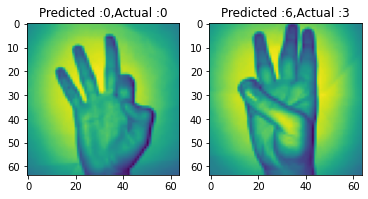

In [35]:
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
imgplt = plt.imshow( X_test[0].reshape(64,64))
ax.set_title('Predicted :{},Actual :{}'.format(my_model_prediction[0].astype(int)[0],Y_test[0].argmax()))

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow( X_test[1].reshape(64,64))
ax.set_title('Predicted :{},Actual :{}'.format(my_model_prediction[1].astype(int)[0],Y_test[1].argmax()))




Text(0.5, 1.0, 'Predicted :4,Actual :4')

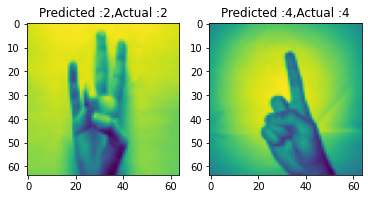

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplt = plt.imshow( X_test[24].reshape(64,64))
ax.set_title('Predicted :{},Actual :{}'.format(my_model_prediction[24].astype(int)[0],Y_test[24].argmax()))
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow( X_test[41].reshape(64,64))
ax.set_title('Predicted :{},Actual :{}'.format(my_model_prediction[41].astype(int)[0],Y_test[41].argmax()))

The images in the given dataset are not mapped correctly to labels, hence the predictions are being made correctly wrt to given labels but are not mapped correctly to the images.